<a href="https://colab.research.google.com/github/johyunkang/adp_certificate/blob/main/adp_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADP 20회
문제출처 : https://www.datamanim.com/dataset/ADPpb/00/p2.html

## 1번
- 날씨 온도 예측, 종속변수 : actual(최고온도)
- 데이터 출처 : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
- 데이터 경로 : /kaggle/input/adp-kr-p2/problem1.csv
- temp_1 : 전날 최고온도
- temp_2 : 전전날 최고온도
- friend : 친구의 예측온도

### 1-1번
데이터 확인 및 전처리
- 데이터 EDA 수행
- 결측치를 확인하고 처리 방안에 대해 논의하라
- 데이터 분할 방법 설명
- 최종 데이터셋이 적절함을 주장하라.

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p2/problem1.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [2]:
# 데이터 EDA 수행
print('\n\n### INFO ###\n', df.info())
print('\n\n### describe ###\n', df.describe())
print('\n\n### NULL CHECK ###\n', df.value_counts().isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


### INFO ###
 None


### describe ###
          year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean  

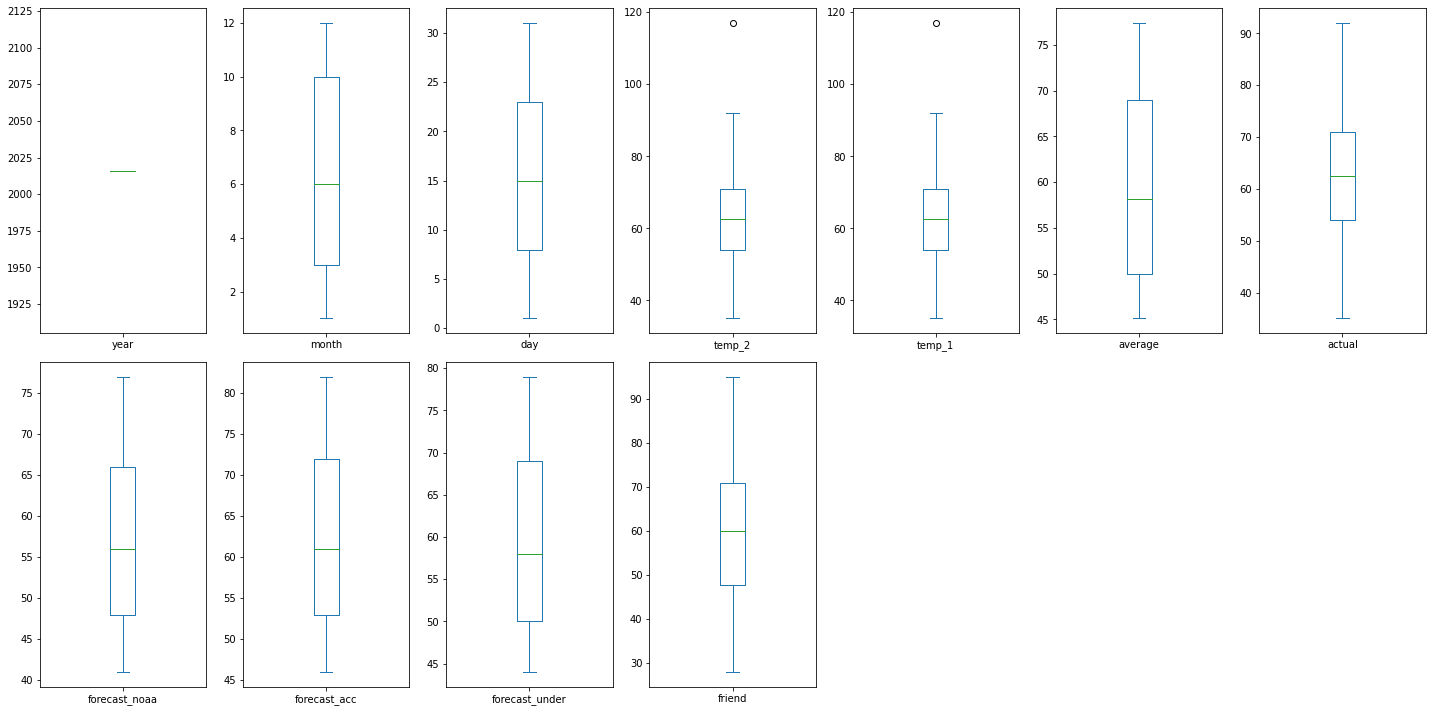

In [3]:
## DATA outlier check
import matplotlib.pyplot as plt
df.plot(kind='box', subplots=True, layout=(2, len(df.columns)// 2+1), figsize=(20, 10))
plt.tight_layout()
plt.show()

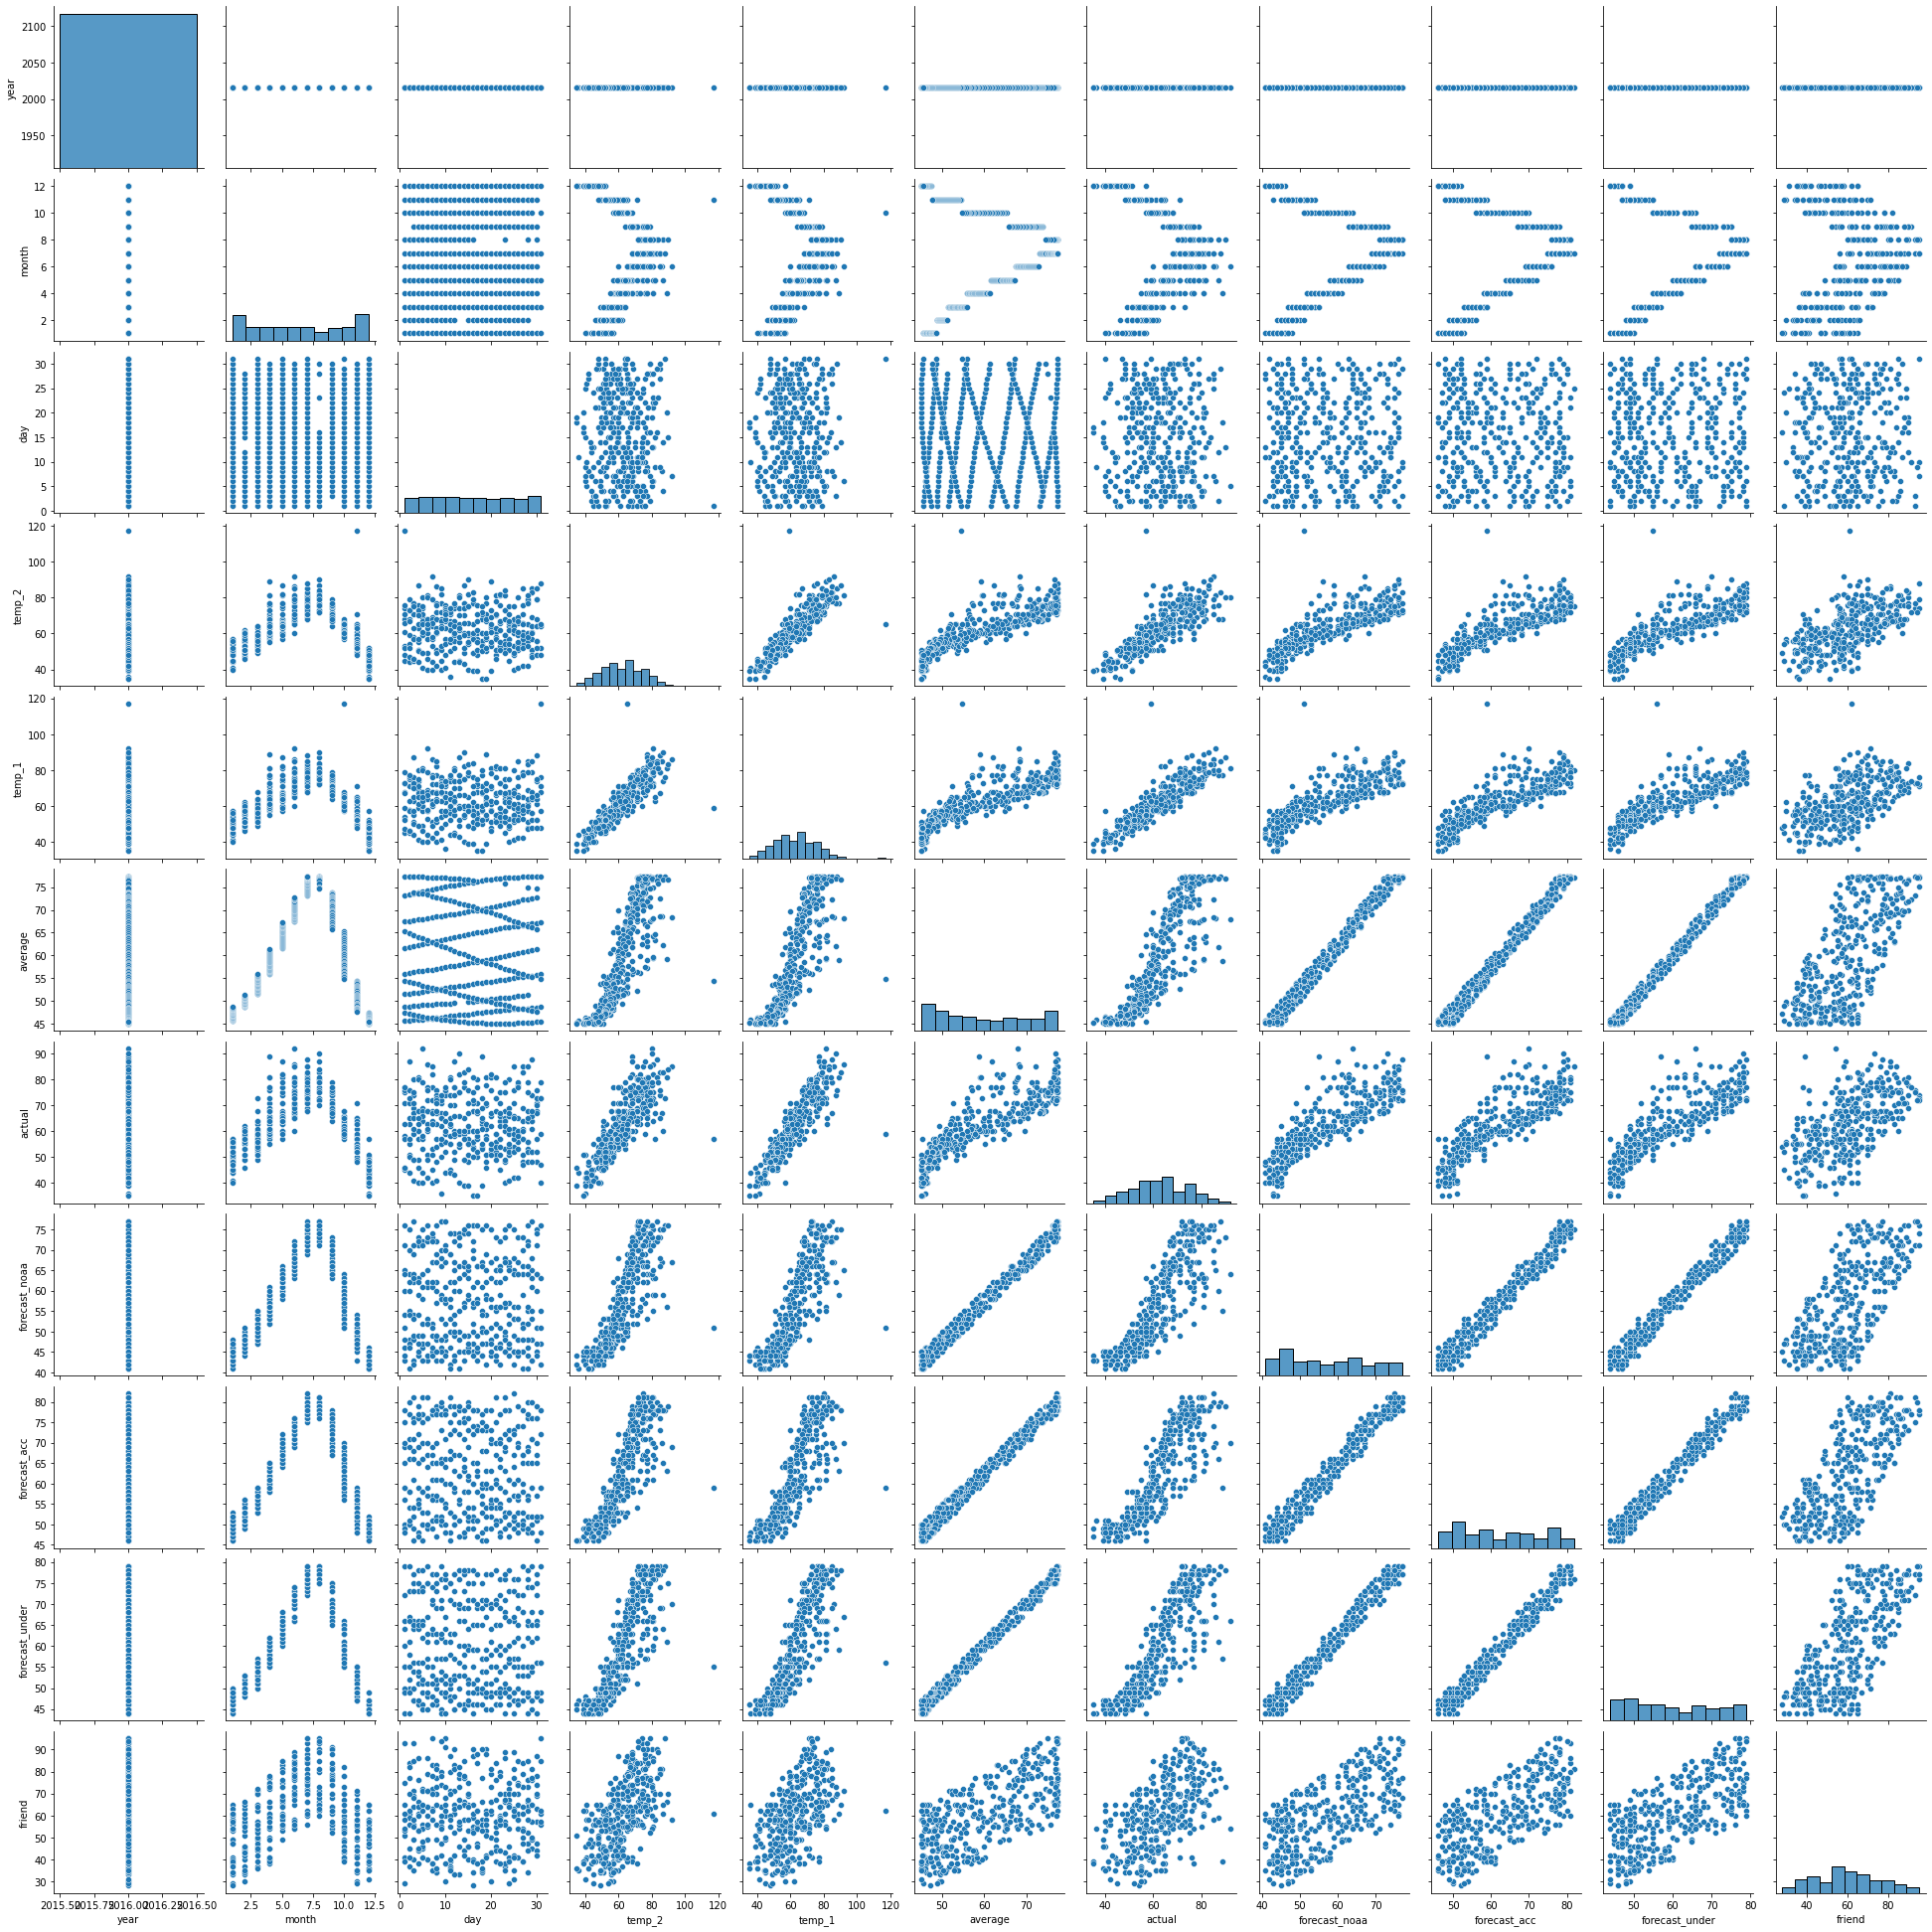

In [4]:
import seaborn as sns
sns.pairplot(df)

In [5]:
df['date'] = df['year'].astype('str')+'-'+df['month'].astype('str')+'-'+df['day'].astype('str')
df['date'] = pd.to_datetime(df['date'])
display(df.head())

display(df.corr())

# 2016-01-01 (Min 값) 부터 2016-12-31 (Max)까지 날짜 문자열 DF 생성
print('Min: ', df['date'].dt.strftime('%Y-%m-%d').min(), ', Max: ', df['date'].dt.strftime('%Y-%m-%d').max())
v = pd.DataFrame(pd.date_range(start=df['date'].dt.strftime('%Y-%m-%d').min(), end=df['date'].dt.strftime('%Y-%m-%d').max()))[0].dt.strftime('%Y-%m-%d').values
# print(type(v))
# print(v)
# 기존 DF에 존재하는 날짜 중 20160101 ~ 20161231 에 존재하지 않는 날짜 확인
a = set(v) - set(df['date'].dt.strftime('%Y-%m-%d'))
print(type(a))
print('존재하지 않는 날짜:', a)
print('존재하지 않는 날짜 갯수:', len(a))

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,date
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,2016-01-01
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,2016-01-02
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,2016-01-03
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,2016-01-04
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,2016-01-05


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529,0.131141,0.127436,0.119786,0.048145
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675,-0.021393,-0.030605,-0.013727,0.024592
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835,0.813134,0.817374,0.819576,0.583758
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880,0.810672,0.815162,0.815943,0.541282
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365,0.990340,0.990705,0.994373,0.689278
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000,0.838639,0.842135,0.838946,0.569145
forecast_noaa,NaN,0.131141,-0.021393,0.813134,0.810672,0.990340,0.838639,1.000000,0.979863,0.985670,0.669221
forecast_acc,NaN,0.127436,-0.030605,0.817374,0.815162,0.990705,0.842135,0.979863,1.000000,0.983910,0.696054
forecast_under,NaN,0.119786,-0.013727,0.819576,0.815943,0.994373,0.838946,0.985670,0.983910,1.000000,0.691177


Min:  2016-01-01 , Max:  2016-12-31
<class 'set'>
존재하지 않는 날짜: {'2016-08-22', '2016-08-31', '2016-09-02', '2016-09-01', '2016-08-29', '2016-08-26', '2016-08-27', '2016-08-20', '2016-08-25', '2016-08-18', '2016-08-17', '2016-08-21', '2016-02-13', '2016-10-30', '2016-08-24', '2016-02-14', '2016-02-29', '2016-08-19'}
존재하지 않는 날짜 갯수: 18


In [6]:
# 상관관계 분석
display(df.corr())

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529,0.131141,0.127436,0.119786,0.048145
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675,-0.021393,-0.030605,-0.013727,0.024592
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835,0.813134,0.817374,0.819576,0.583758
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880,0.810672,0.815162,0.815943,0.541282
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365,0.990340,0.990705,0.994373,0.689278
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000,0.838639,0.842135,0.838946,0.569145
forecast_noaa,NaN,0.131141,-0.021393,0.813134,0.810672,0.990340,0.838639,1.000000,0.979863,0.985670,0.669221
forecast_acc,NaN,0.127436,-0.030605,0.817374,0.815162,0.990705,0.842135,0.979863,1.000000,0.983910,0.696054
forecast_under,NaN,0.119786,-0.013727,0.819576,0.815943,0.994373,0.838946,0.985670,0.983910,1.000000,0.691177


In [7]:
# 데이터 분할
dfd = pd.get_dummies(df)
df_drop = dfd.drop(columns=['year', 'month', 'day', 'friend', 'date'])

x = df_drop.drop(columns=['actual'])
y = df_drop['actual']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

print('''
ANSWER : 데이터 상에서 수치 결측치는 존재하지 않는다. 시계열 데이터 관점으로 봤을때, 18일치의 일자 데이터가
결측치로 존재한다.

문제 해결시 시계열 방식으로 접근하지 않을 것이기에 누락된 일자에 대해서 따로 결측치 처리를 해주지 않을 것이다.
시계열 관점으로 해석을 할 경우 누락된 데이터는 평균 보간을 실시하여 처리할 수 있다.

데이터 시각화 결과 상관관계를 보이는 컬럼들이 확인되며 주기적 경향을 보이는 데이터들이 확인된다.

year, month, day, week 값은 불필요 컬럼으로 제외한다. week의 경우 원핫인코딩을 진행해서 추가한다.
train, test 셋은 8:2 비율로 나눠서 모델링을 진행한다.

friend 컬럼의 경우 상관관계를 확인했을 때 상대적으로 낮은 값을 가지기에 제외하고 학습을 진행한다.
''')


ANSWER : 데이터 상에서 수치 결측치는 존재하지 않는다. 시계열 데이터 관점으로 봤을때, 18일치의 일자 데이터가
결측치로 존재한다.

문제 해결시 시계열 방식으로 접근하지 않을 것이기에 누락된 일자에 대해서 따로 결측치 처리를 해주지 않을 것이다.
시계열 관점으로 해석을 할 경우 누락된 데이터는 평균 보간을 실시하여 처리할 수 있다.

데이터 시각화 결과 상관관계를 보이는 컬럼들이 확인되며 주기적 경향을 보이는 데이터들이 확인된다.

year, month, day, week 값은 불필요 컬럼으로 제외한다. week의 경우 원핫인코딩을 진행해서 추가한다.
train, test 셋은 8:2 비율로 나눠서 모델링을 진행한다.

friend 컬럼의 경우 상관관계를 확인했을 때 상대적으로 낮은 값을 가지기에 제외하고 학습을 진행한다.



### 1-2
Random Forest 모델 적합 및 검증
 - RandomForest 학습 및 예측 결과 해석
 - 예측결과 검정 해석, 중요변수 도출
 - 변수 중요성 분석 및 그래프 출력

RandomForest r2_score: 0.8399186619591019
learning time: 0.18823480606079102


forest importances: temp_2            0.026248
temp_1            0.424267
average           0.363211
forecast_noaa     0.043986
forecast_acc      0.097251
forecast_under    0.018659
week_Fri          0.002448
week_Mon          0.005903
week_Sat          0.003715
week_Sun          0.005519
week_Thurs        0.002434
week_Tues         0.003390
week_Wed          0.002970
dtype: float64
temp_1, average, forecast_acc 순으로 변수 중요도를 확인할 수 있다


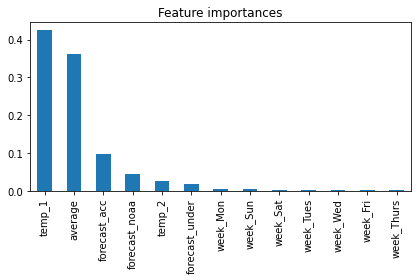

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plt

result = []
rf = RandomForestRegressor(random_state=22)
start = time.time()
rf.fit(x_train, y_train)
end = time.time()

pred = rf.predict(x_test)
print('RandomForest r2_score:', r2_score(y_test, pred))
print('learning time:', end - start)
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index = x_train.columns)
print('\n\nforest importances:', forest_importances)

fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar(ax = ax)
ax.set_title('Feature importances')
fig.tight_layout()

print('temp_1, average, forecast_acc 순으로 변수 중요도를 확인할 수 있다')

result.append([end - start, r2_score(y_test, pred)])

### 1-3
**SVM(Support Vector Machine)** 모델 적합 및 검증
- SVM 학습 및 예측 결과 해석
- 예측 결과 검정 해석, 중요변수 도출
- 변수 중요성 분석 및 그래프 출력

In [9]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import time

svm = SVR()
start = time.time()
svm.fit(x_train, y_train)
end = time.time()

pred = svm.predict(x_test)
print('svm r2 score:', r2_score(y_test, pred))
print('learning time:', end - start)
print('SVM은 변수 중요도를 따로 추출할 수 없다. r2_score의 경우 RF에 비해 낮다')

result.append([end-start, r2_score(y_test,pred)])

svm r2 score: 0.8138036782618503
learning time: 0.010472774505615234
SVM은 변수 중요도를 따로 추출할 수 없다. r2_score의 경우 RF에 비해 낮다


### 1-4
모델 비교 및 향후 개선 방향 도출
- RandomForest, SVM 모델의 결과 비교 후 최종 모델 선택
- 두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?
- 모델링 관련 추후 개선 방향 제시

In [10]:
result_df = pd.DataFrame(result, columns=['learning time', 'r2_score'])
result_df.index=['RandomForest', 'SVM']
display(result_df)

print('''
파라미터 튜닝을 제외한 기본모델의 경우 모델학습 시간은 RandomForest에 비해 SVM이 더 짧다.
test셋에 대한 모델 r2_score는 RandomForest가 더 높다.
모델 학습시간에 중점을 둔다면 SVM이 더유리하다.
하지만 RandomForest의 경우 변수 중요도를 확인할 수 있고, 정확도가 더 높기 때문에
최종적으로는 RandomForest를 선택한다.
''')

,learning time,r2_score
RandomForest,0.188235,0.839919
SVM,0.010473,0.813804



파라미터 튜닝을 제외한 기본모델의 경우 모델학습 시간은 RandomForest에 비해 SVM이 더 짧다.
test셋에 대한 모델 r2_score는 RandomForest가 더 높다.
모델 학습시간에 중점을 둔다면 SVM이 더유리하다.
하지만 RandomForest의 경우 변수 중요도를 확인할 수 있고, 정확도가 더 높기 때문에
최종적으로는 RandomForest를 선택한다.



## 2번
5분 간격의 가구별 전력 사용량의 데이터

데이터 출처 : datamanim 자체 생성

데이터 경로 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p2/problem2.csv

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

ttt = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p2/problem2.csv')
display(ttt.info())
display(ttt.describe())
print('\n\n\n ======== NaN ======== \n', ttt.isnull().sum())
display(ttt.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401760 entries, 0 to 401759
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   houseCode          401760 non-null  object 
 1   date               401760 non-null  object 
 2   power consumption  401760 non-null  float64
dtypes: float64(1), object(2)
memory usage: 9.2+ MB


None

,power consumption
count,401760.000000
mean,79.686964
std,60.230711
min,0.000207
25%,31.764479
50%,67.363793
75%,114.926222
max,446.190933





 ======== NaN ======== 
 houseCode            0
date                 0
power consumption    0
dtype: int64


,houseCode,date,power consumption
0,house_01,2050-01-14 21:00:00,57.559878
1,house_26,2050-01-02 19:10:00,59.726880
2,house_25,2050-01-13 07:20:00,6.558823
3,house_20,2050-01-26 04:55:00,58.514589
4,house_09,2050-01-18 22:50:00,5.717009


### 2-1
**데이터 전처리**
각 가구의 15분 간격의 전력량의 합을 구하고 해당 데이터를 바탕으로 총 5개의 군집으로 군집화를 진행 후 아래의 그림과 같은 형태로 출력하라.

군집화를 위한 데이터 구성의 이유를 설명하라.

(군집 방식에 따라 Cluster 컬럼의 값은 달라질 수 있음)

![hose-code](https://github.com/Datamanim/datarepo/blob/main/adp/p2/problem2.png?raw=true)

In [14]:
tt = ttt.sort_values(['houseCode', 'date']).reset_index(drop=True)
tt['date'] = pd.to_datetime(tt['date'])
tg = tt.groupby(['houseCode']).resample('15min', on='date')['power consumption'].sum().reset_index()
tg = tg.rename(columns={'power consumption':'power consumption sum'})
tgg = tg.copy()

display(tgg.head())

tgg['c'] = tgg['houseCode'].str[-2:].astype('int')
tgg['d'] = tgg['date'].dt.hour
tgg['e'] = tgg['date'].dt.day
print('\n\n ##### C D E #####')
display(tgg.head())


from sklearn.cluster import KMeans

# k-means clustering 실행
kmeans = KMeans(n_clusters=5)
kmeans.fit(tgg.iloc[:, 2:].values)

tg['Cluster'] = kmeans.labels_

tg

,houseCode,date,power consumption sum
0,house_00,2050-01-01 00:00:00,136.249952
1,house_00,2050-01-01 00:15:00,98.283387
2,house_00,2050-01-01 00:30:00,53.967679
3,house_00,2050-01-01 00:45:00,204.821270
4,house_00,2050-01-01 01:00:00,150.760786




 ##### C D E #####


,houseCode,date,power consumption sum,c,d,e
0,house_00,2050-01-01 00:00:00,136.249952,0,0,1
1,house_00,2050-01-01 00:15:00,98.283387,0,0,1
2,house_00,2050-01-01 00:30:00,53.967679,0,0,1
3,house_00,2050-01-01 00:45:00,204.821270,0,0,1
4,house_00,2050-01-01 01:00:00,150.760786,0,1,1


,houseCode,date,power consumption sum,Cluster
0,house_00,2050-01-01 00:00:00,136.249952,1
1,house_00,2050-01-01 00:15:00,98.283387,1
2,house_00,2050-01-01 00:30:00,53.967679,1
3,house_00,2050-01-01 00:45:00,204.821270,3
4,house_00,2050-01-01 01:00:00,150.760786,3
...,...,...,...,...
133915,house_44,2050-01-31 22:45:00,334.675717,0
133916,house_44,2050-01-31 23:00:00,463.419892,4
133917,house_44,2050-01-31 23:15:00,369.930740,0
133918,house_44,2050-01-31 23:30:00,237.713030,2


### 2-2
**히트맵 시각화**

2-1의 데이터를 바탕으로 각 군집의 요일, 15분 간격별 전략 사용량의 합을 구한 후 아래와 같이 시각화 하여라

(수치는 동일하지 않을 수 있음. 2-1의 데이터가 정확하게 아래와 같은 이미지로 변화 됐는지 주로 확인)

![heat-map](https://github.com/Datamanim/datarepo/blob/main/adp/p2/problem2_Example.png?raw=true)

,Cluster,day,min,power consumption sum
0,0,Friday,00:00,14072.669816
1,0,Friday,00:15,8744.062857
2,0,Friday,00:30,8573.483679
3,0,Friday,00:45,8995.350568
4,0,Friday,01:00,10617.693556
...,...,...,...,...
3355,4,Wednesday,22:45,6541.490231
3356,4,Wednesday,23:00,5117.337623
3357,4,Wednesday,23:15,4526.862109
3358,4,Wednesday,23:30,2772.305890


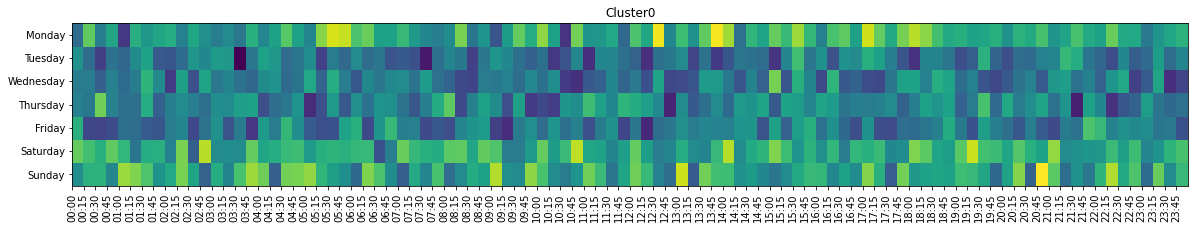




 ##### PVT ##### 



min,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
day,,,,,,,,,,,,,,,,,,,,,
Sunday,4591.535323,5376.985536,6001.761338,5220.020705,4388.594239,4808.285140,4232.695792,4675.709659,5406.302312,4976.549604,...,5118.917966,3983.440376,5721.072325,5057.305654,5826.009485,4415.994693,3822.837860,5008.210063,4828.676948,4608.845284
Saturday,3820.141251,4135.682795,4238.577788,4632.041251,5100.220910,4833.913239,3801.566515,4537.745708,4088.076671,4806.627978,...,4049.557601,5409.213614,4074.561282,5357.027526,5419.019266,5517.321619,6011.360533,5067.853917,3855.318196,5408.813415
Friday,3451.943393,3912.164276,3751.280033,3918.861825,3489.727378,3038.507936,3543.336412,4070.048215,3075.392139,4351.625451,...,4152.846241,3298.557930,3018.407839,3230.386721,3584.575139,4339.704119,3232.225500,3821.393192,4078.355066,4526.385260
Thursday,4008.514601,4022.717663,3158.068308,2807.609189,3150.465416,4729.502357,3590.935561,3001.765321,3082.390866,5096.212685,...,5401.588672,4048.478516,2732.697083,2338.938659,3910.568787,3862.803560,3348.733014,3678.310668,4331.357314,4005.997529
Wednesday,3393.659727,3509.218716,4586.039845,2717.824345,3929.898373,3615.546107,2658.900442,2671.000695,4498.098894,2334.755163,...,3673.105505,4296.694137,3189.616654,4206.094276,3310.243213,3615.697900,4303.101576,3445.380394,3972.878935,4023.038644
Tuesday,3634.613833,4625.167248,3900.342231,2744.438772,4744.356468,4084.556549,4351.965965,3160.250860,3845.992957,4372.298588,...,3725.338682,3379.323519,3574.743410,3579.364161,2310.585308,4845.886676,4267.769346,3789.915008,3363.332979,3019.845025
Monday,5561.087538,3771.107316,5459.286324,5671.504945,4817.705813,5107.888425,5866.669775,4503.701378,3914.033880,4414.949539,...,3897.377006,5132.964188,4182.650107,5095.925393,4834.987388,5876.682688,5451.110006,4844.662945,5442.734297,4951.010163


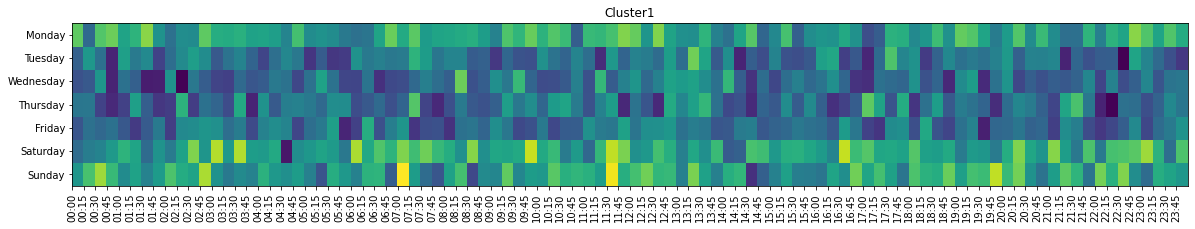

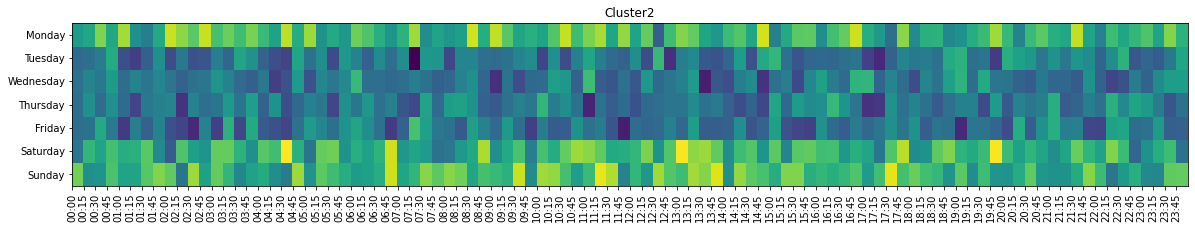

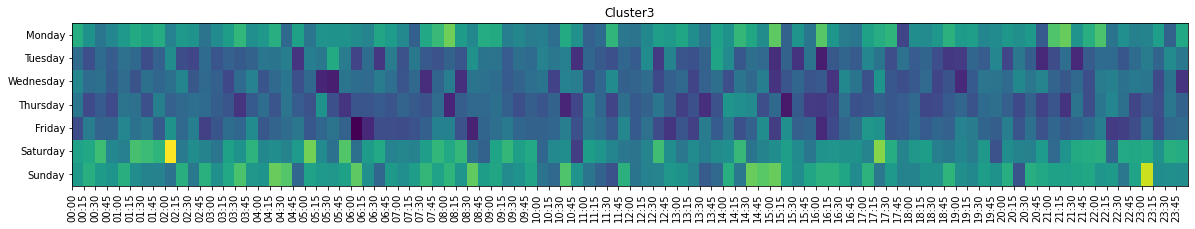

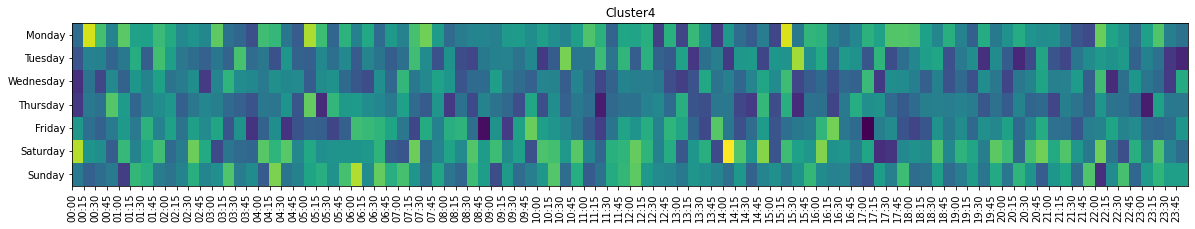

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tg['day'] = tg.date.dt.day_name()
tg['min'] = tg.date.dt.strftime('%H:%M')
pv = tg.groupby(['Cluster', 'day', 'min'], as_index=False).sum()
display(pv)
for v in range(5) :
    plt.figure(figsize=(20, 3))
    target = pv.loc[pv.Cluster==v]
    pvt = target.pivot(index='day', columns='min', values='power consumption sum').reindex(['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday'])
    if(v==1) :
        print('\n\n\n ##### PVT ##### \n')
        display(pvt)
    plt.pcolor(pvt)
    plt.title('Cluster'+str(v))
    plt.xticks(range(len(pvt.columns)), pvt.columns, rotation=90) # rotation=90은 분 글자가 90도 돌아가게
    plt.yticks(np.arange(len(pvt.index))+0.5, pvt.index) # +0.5 는 Y축의 tick이 값의 가운데로 가게 하기 위해 설정
    plt.show()

## 3번
태양광 데이터

데이터 출처 : https://www.kaggle.com/cheedcheed/california-renewable-production-20102018

데이터 경로 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p2/problem3.csv

예측 변수 : SOLAR PV

In [31]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p2/problem3.csv')
display(df.info())
display(df.describe())
display(df.isnull().sum())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44904 entries, 0 to 44903
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIMESTAMP      44904 non-null  object 
 1   BIOGAS         44904 non-null  float64
 2   BIOMASS        44904 non-null  float64
 3   GEOTHERMAL     44904 non-null  float64
 4   Hour           44904 non-null  float64
 5   SMALL HYDRO    44904 non-null  float64
 6   SOLAR          0 non-null      float64
 7   SOLAR PV       44904 non-null  float64
 8   SOLAR THERMAL  44904 non-null  float64
 9   WIND TOTAL     44904 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.4+ MB


None

,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
count,44904.000000,44904.000000,44904.000000,44904.000000,44904.000000,0.0,44904.000000,44904.000000,44904.000000
mean,185.700405,283.616604,945.298882,12.500000,284.281200,NaN,1647.195706,117.254521,1478.654262
std,19.947924,59.600559,89.507178,6.922264,132.114683,NaN,2390.975782,188.736880,1135.239178
min,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,172.000000,237.000000,883.000000,6.750000,176.000000,NaN,0.000000,0.000000,413.750000
50%,187.000000,283.000000,928.000000,12.500000,272.000000,NaN,3.000000,0.000000,1301.000000
75%,199.000000,332.000000,1011.000000,18.250000,374.000000,NaN,2955.000000,213.000000,2374.000000
max,248.000000,423.000000,1230.000000,24.000000,678.000000,NaN,9373.000000,725.000000,4914.000000


TIMESTAMP            0
BIOGAS               0
BIOMASS              0
GEOTHERMAL           0
Hour                 0
SMALL HYDRO          0
SOLAR            44904
SOLAR PV             0
SOLAR THERMAL        0
WIND TOTAL           0
dtype: int64

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2012-11-26 00:00:00,208.0,354.0,926.0,1.0,208.0,NaN,0.0,0.0,57.0
1,2012-11-26 01:00:00,207.0,354.0,927.0,2.0,207.0,NaN,0.0,0.0,76.0
2,2012-11-26 02:00:00,208.0,353.0,927.0,3.0,208.0,NaN,0.0,0.0,100.0
3,2012-11-26 03:00:00,208.0,350.0,927.0,4.0,209.0,NaN,0.0,0.0,111.0
4,2012-11-26 04:00:00,209.0,352.0,927.0,5.0,209.0,NaN,0.0,0.0,131.0


### 3-1
데이터셋 분할 및 결과 검증
- 데이터셋 7:3 분할
- 데이터 전처리 및 예측모델 생성
- 모델 성능 검증 : RMSE, R2, 정확도(아래방식으로 연산)로 구하여라
- 정확도의 경우 `실제값 > 예측값` 인 경우 `(1-예측값/실제값)`, `실제값 < 예측값`인 경우 `(1-실제값/예측값)`으로 하고 이것들을 평균낸 후 1에서 뺀값으로 한다.
- 분수식의 분모가 0인 경우 정확돈느 0.5로 취급
- 최종결과제출 : 소수점 3째자리 반올림

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

df = df.drop(columns=['SOLAR'])

def suntimeChecker(x) :
    if pd.to_datetime(x).hour in list(range(6, 18)) :
        return 1
    else :
        return 0

df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df['suntime'] = df['TIMESTAMP'].apply(suntimeChecker)

x = df.drop(columns=['TIMESTAMP', 'Hour', 'SOLAR PV'])
y = df['SOLAR PV']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.3)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)



In [42]:
def getEachAccuracy(y_true, y_pred) :
    # if y_true > y_pred and y_true == 0 : # 이 요건으로 하면 NAN 값이 산출
    if y_true == 0 :
        return 0.5
    # if y_true < y_pred and y_pred == 0 : # 이 요건으로 하면 NAN 값이 산출
    if y_pred == 0 :
        return 0.5

    if y_true > y_pred :
        return 1-(y_pred / y_true)
    else :
        return 1-(y_true / y_pred)

acc = []
for i, v in enumerate(y_test) :
    acc.append(getEachAccuracy(v, pred[i]))



In [39]:
# acc_df = pd.DataFrame(acc)
# display(acc_df.head(30))
# display(acc_df.isnull().sum())
print(pred[:29])

[2.66690e+02 1.33000e+00 3.38585e+03 2.74929e+03 5.10968e+03 0.00000e+00
 6.63379e+03 6.49630e+02 0.00000e+00 4.18311e+03 0.00000e+00 4.68169e+03
 0.00000e+00 3.33924e+03 4.30684e+03 1.14859e+03 0.00000e+00 0.00000e+00
 8.59036e+03 2.80000e-01 1.52026e+03 0.00000e+00 1.77700e+01 2.97385e+03
 3.44781e+03 3.00040e+02 2.19000e+01 2.17372e+03 6.63982e+03]


In [43]:
# 데이터 전처리의 경우 날짜 컬럼을 제외하고, nan 값만 있는 컬럼을 제외했다.
# 해가 존재하는 시각을 06 ~ 18시로 설정해서 파생변수를 만들어 줬다.
# 정확도의 경우 아래와 같다.
print('RMSE:', round(mean_squared_error(y_test, pred)**0.5, 3)) # 왜 0.5 제곱을 해주지? ROOT를 위해 
print('R2:', round(r2_score(y_test, pred), 3))
print('accuracy:', round(sum(acc) / len(acc), 3))

RMSE: 704.163
R2: 0.913
accuracy: 0.377
